<a href="https://colab.research.google.com/github/brunonbn/intro-data-science/blob/main/IntroDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape

(100836, 4)

In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [4]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [6]:
notas['nota'].mean()

3.501556983616962

In [7]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

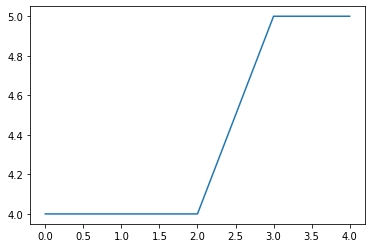

In [8]:
notas.nota.head().plot()

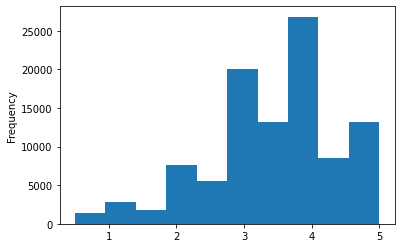

In [9]:
notas.nota.plot(kind='hist')

In [10]:
print("Média:", notas.nota.head().mean())
print("Mediana:", notas.nota.head().median())

Média: 4.4
Mediana: 4.0


In [11]:
print("Média:", notas.nota.mean())
print("Mediana:", notas.nota.median())

Média: 3.501556983616962
Mediana: 3.5


In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


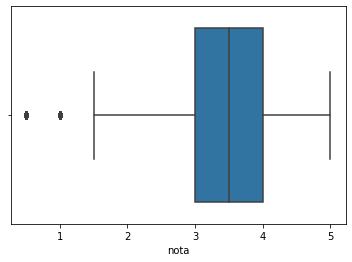

In [13]:
import seaborn as sns

sns.boxplot(notas.nota)

# Olhando os filmes

In [14]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

In [15]:
#retorna a media de avaliacao do filme com id 1 (Toy Story)
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [16]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

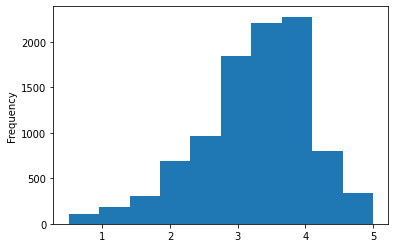

In [17]:
medias_por_filme.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


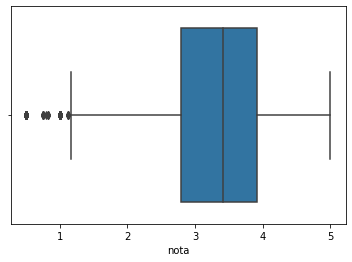

In [18]:
sns.boxplot(medias_por_filme)

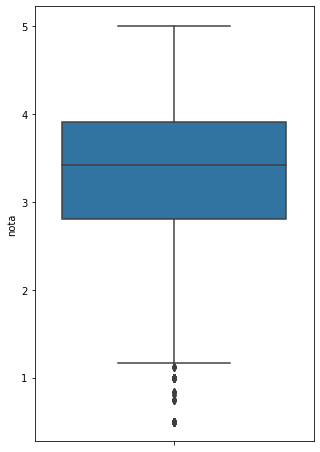

In [19]:
import matplotlib.pyplot as plt

#possivel fazer o boxplot tambem na vertical
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [20]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


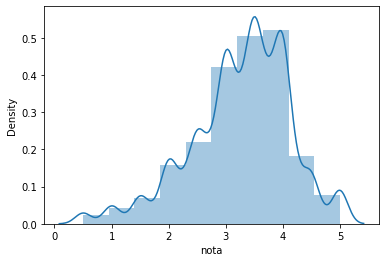

In [21]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

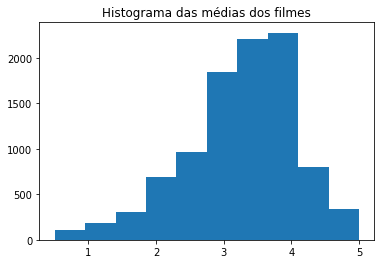

In [22]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [23]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
#conta quantas vezes cada um dos valores do campo aparecem
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
cs       2
ta       2
ro       2
id       2
ar       2
is       1
no       1
ps       1
hu       1
el       1
af       1
xx       1
pl       1
ky       1
tr       1
nb       1
te       1
sl       1
vi       1
Name: original_language, dtype: int64

In [26]:
# o retorno e uma seria com uma única coluna - isso fica mais claro ao pegar as propriedades index e values
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'cs', 'ta', 'ro', 'id', 'ar', 'is',
       'no', 'ps', 'hu', 'el', 'af', 'xx', 'pl', 'ky', 'tr', 'nb', 'te', 'sl',
       'vi'],
      dtype='object')

In [27]:
# coluna msm de valor so existe uma - a outra e o indice da serie
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [28]:
# e possivel transformar a serie em dataframe com o comando toframe
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


In [29]:
# msm sendo um dataframe o indice ainda nao e uma coluna - para isso, usar o reset_index()
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


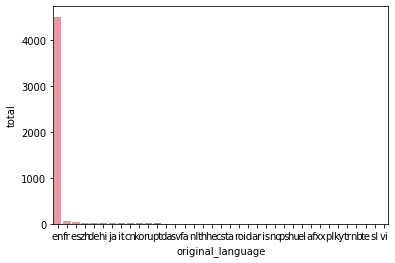

In [30]:
# para plotar as categorias com o seaborn, procurar no google: "seaborn categorical plot"
# http://seaborn.pydata.org/tutorial/categorical.html
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

In [31]:
# para saber a versão do seaborn
print(sns.__version__)

0.11.2


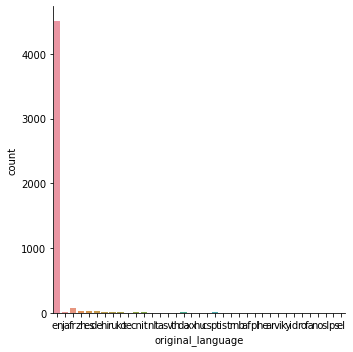

In [32]:
#para importar uma versão específica
#!pip install seaborn==0.9.0

#para gerar um plot similar, mas com o dataframe original - sem todo o esforço de tratamento de dados que tivemos
sns.catplot(x = "original_language", kind="count", data=tmdb)

In [33]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [34]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


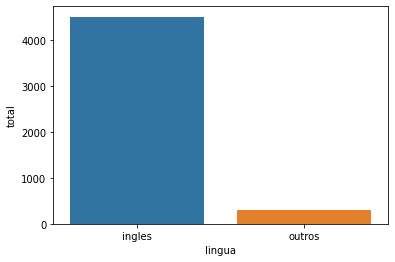

In [35]:
sns.barplot(x="lingua", y="total", data=dados)

In [36]:
tmdb.query("original_language == 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New Yo

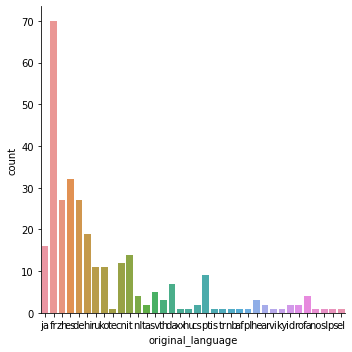

In [37]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles)

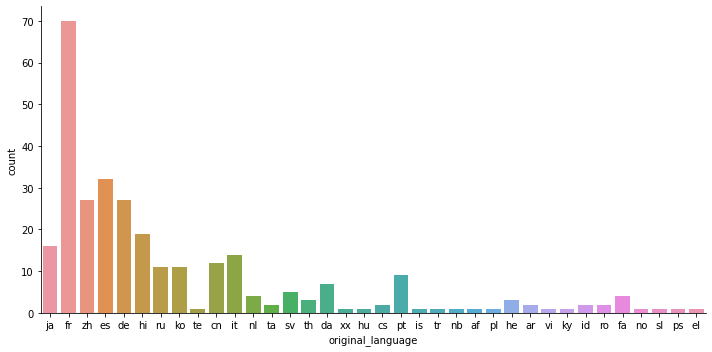

In [38]:
#mudando a propriedade aspect do catplot, do default 1 para 2 - na pratica o grafico deixa de ser um quadrado e passa a ser um retângulo
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles, aspect=2)

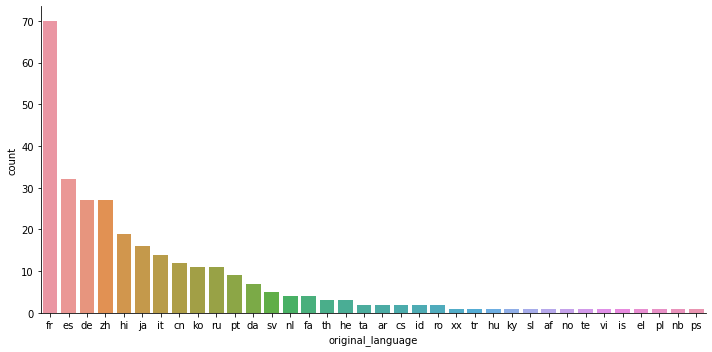

In [39]:
#define a ordenacao usando a serie que tras as linguas diferentes de ingles, usando então o value_count e o index
total_filmes_sem_lingua_original_em_ingles = filmes_sem_lingua_original_em_ingles.original_language.value_counts()
sns.catplot(x="original_language",
            kind="count",
            data=filmes_sem_lingua_original_em_ingles,
            aspect=2,
            order=total_filmes_sem_lingua_original_em_ingles.index)

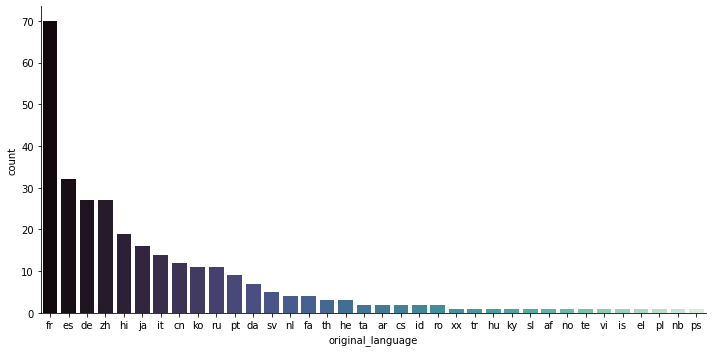

In [40]:
#incluindo também a paleta de cores
#https://seaborn.pydata.org/generated/seaborn.color_palette.html
#https://seaborn.pydata.org/tutorial/color_palettes.html
sns.catplot(x="original_language",
            kind="count",
            data=filmes_sem_lingua_original_em_ingles,
            aspect=2,
            palette="mako",
            order=total_filmes_sem_lingua_original_em_ingles.index)

#Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma

In [42]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [43]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [45]:
print('Nota média do Toy Story %.2f' % notas_do_toy_story.nota.mean())
print('Nota média do Jumanji %.2f' % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [46]:
print('Mediana do Toy Story %.2f' % notas_do_toy_story.nota.median())
print('Mediana do Jumanji %.2f' % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [47]:
import numpy as np

3.0 3.0


In [53]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7efbff2bbd50>,
 'caps': [<matplotlib.lines.Line2D at 0x7efbfef54710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efbff2b8290>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efbff2b8d50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efbfef9e5d0>,
  <matplotlib.lines.Line2D at 0x7efbfefb1d90>]}

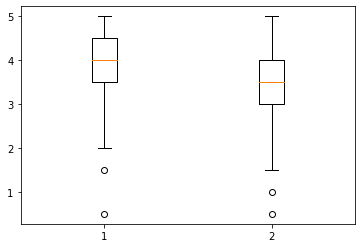

In [49]:
  plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

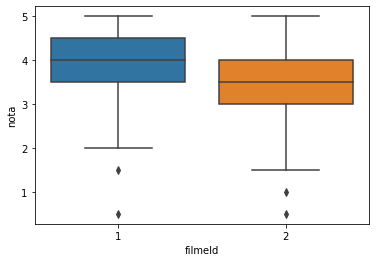

In [50]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in [1, 2]"))

In [52]:
# desvio padrao mostra o quanto os dados fogem de uma tendência central
# a média mostra uma tendência central, quando usamos o desvio padrao temos uma tendencia de dispersao desses dados
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


##Dados podem ser obtidos das seguintes fontes:
### Google DataSet Search
https://datasetsearch.research.google.com/

### Kaggle
https://www.kaggle.com/

**este notebook usa os arquivos "movies.csv", "ratings.csv" e "tmdb_500_movies.csv"**